In [124]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import scikitplot as skplt
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline



In [125]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'outcome']
# load dataset
data=pd.read_csv("diabetes.csv",names=col_names, header=0)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [126]:
X = data.iloc[:,:-1] # Features
y = data.outcome

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [128]:
# Create Random Forest classifer object
RF = RandomForestClassifier(random_state=0)
# Train RF Classifer
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

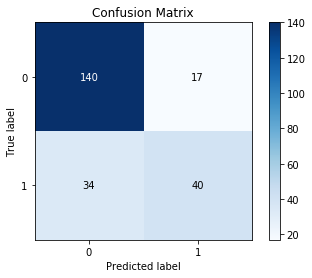

In [129]:
#Predict the response for test dataset
predictions = RF.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, predictions)

In [130]:
print("Accuracy",metrics.accuracy_score(y_test,predictions))
print("F1",metrics.f1_score(y_test,predictions))

Accuracy 0.7792207792207793
F1 0.6106870229007634


## impact of n_estimators

In [139]:
rf=RandomForestClassifier(random_state=0)
parameters = {'n_estimators':range(50,500,50)}
rf_cv = GridSearchCV(rf, parameters,cv=5, return_train_score=True,scoring="f1")
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [140]:
# scores of GridSearch CV
scores = rf_cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.286745,0.090903,0.026191,0.002232,50,{'n_estimators': 50},0.584615,0.658537,0.702703,0.485714,...,0.617564,0.076018,3,1.0,1.0,1.0,0.993548,1.0,0.99871,0.002581
1,0.655915,0.130542,0.058345,0.014859,100,{'n_estimators': 100},0.606061,0.658537,0.712329,0.424242,...,0.613567,0.100495,8,1.0,1.0,1.0,1.000000,1.0,1.00000,0.000000
2,1.284522,0.068059,0.086616,0.021183,150,{'n_estimators': 150},0.617647,0.658537,0.712329,0.430769,...,0.619241,0.099056,2,1.0,1.0,1.0,1.000000,1.0,1.00000,0.000000
3,1.550049,0.180896,0.101955,0.030839,200,{'n_estimators': 200},0.588235,0.666667,0.712329,0.417910,...,0.612413,0.105360,9,1.0,1.0,1.0,1.000000,1.0,1.00000,0.000000
4,2.055799,0.222742,0.143667,0.016357,250,{'n_estimators': 250},0.597015,0.666667,0.694444,0.441176,...,0.615245,0.093116,5,1.0,1.0,1.0,1.000000,1.0,1.00000,0.000000


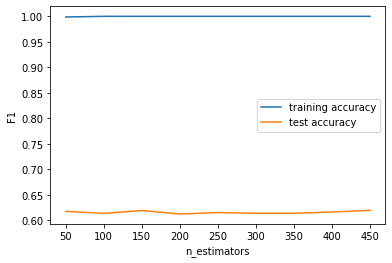

{'n_estimators': 450}


In [141]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("F1")
plt.legend()
plt.show()
print(rf_cv.best_params_)

In [142]:
RF=RandomForestClassifier(n_estimators=450, random_state=0)
RF.fit(X_train,y_train)
predictions = RF.predict(X_test)
#skplt.metrics.plot_confusion_matrix(y_test, predictions)
print("Accuracy",metrics.accuracy_score(y_test,predictions))
print("F1",metrics.f1_score(y_test,predictions))

Accuracy 0.7922077922077922
F1 0.6363636363636365


## Impact of max_depth

In [143]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
parameters = {'max_depth':range(1,50)}
rf_cv = GridSearchCV(rf, parameters,cv=5, return_train_score=True,scoring="f1")
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [144]:
# scores of GridSearch CV
scores = rf_cv.cv_results_
pd.DataFrame(scores).head();

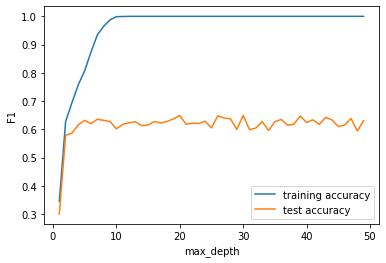

{'max_depth': 30}


In [145]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("F1")
plt.legend()
plt.show()
print(rf_cv.best_params_)

In [146]:
RF=RandomForestClassifier(max_depth=30,n_estimators=250, random_state=0)
RF.fit(X_train,y_train)
predictions = RF.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test,predictions))
print("F1",metrics.f1_score(y_test,predictions))

Accuracy 0.7878787878787878
F1 0.6259541984732825
